# Iris Flower Classification with Logistic Regression

This notebook dives into the **Iris dataset** from sklearn, a classic dataset for classifying flowers into **3 species** (Setosa, Versicolor, Virginica) based on 4 features. We'll use **Logistic Regression** and evaluate its performance using **cross_val_score** for robust metrics. Expect vibrant visualizations, clear explanations, and insightful reflections to make this analysis pop!

## Objectives
- Load and explore the Iris dataset.
- Train a Logistic Regression model and assess it with cross-validation.
- Visualize feature distributions, model performance, and predictions.
- Record observations and reflections to highlight key findings.

## 1. Importing Libraries
We'll import essential libraries for data handling, modeling, and visualization. We'll use `seaborn` and `matplotlib` for eye-catching plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

# Set a vibrant style for plots
plt.style.use('seaborn-v0_8-dark')
sns.set_palette('Set2')

## 2. Loading and Exploring the Iris Dataset
The Iris dataset contains 150 samples with 4 features (sepal length, sepal width, petal length, petal width) and 3 classes. Let's load and inspect it.

In [2]:
# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Display basic info
print("Dataset Shape:", X.shape)
print("\nFeature Names:\n", iris.feature_names)
print("\nTarget Classes:\n", iris.target_names)

# Show first few rows
X.head()

Dataset Shape: (150, 4)

Feature Names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Classes:
 ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Observation
- The dataset has **150 samples** and **4 features**, making it compact yet rich for classification.
- The target variable has **3 classes**: Setosa, Versicolor, Virginica.
- Features are continuous, ideal for Logistic Regression, which assumes linear boundaries.

## 3. Data Preprocessing
We'll scale the features to ensure consistent model performance and split the data into training and test sets (70% train, 30% test).

In [3]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (105, 4)
Test Set Shape: (45, 4)


### Observation
- Scaling standardizes features to zero mean and unit variance, improving Logistic Regression convergence.
- The 70-30 split gives **105 training samples** and **45 test samples**, balancing training and evaluation.

## 4. Visualizing Feature Distributions
Let's create a pairplot to explore feature relationships and class separability, using a colorful palette to make it stand out.

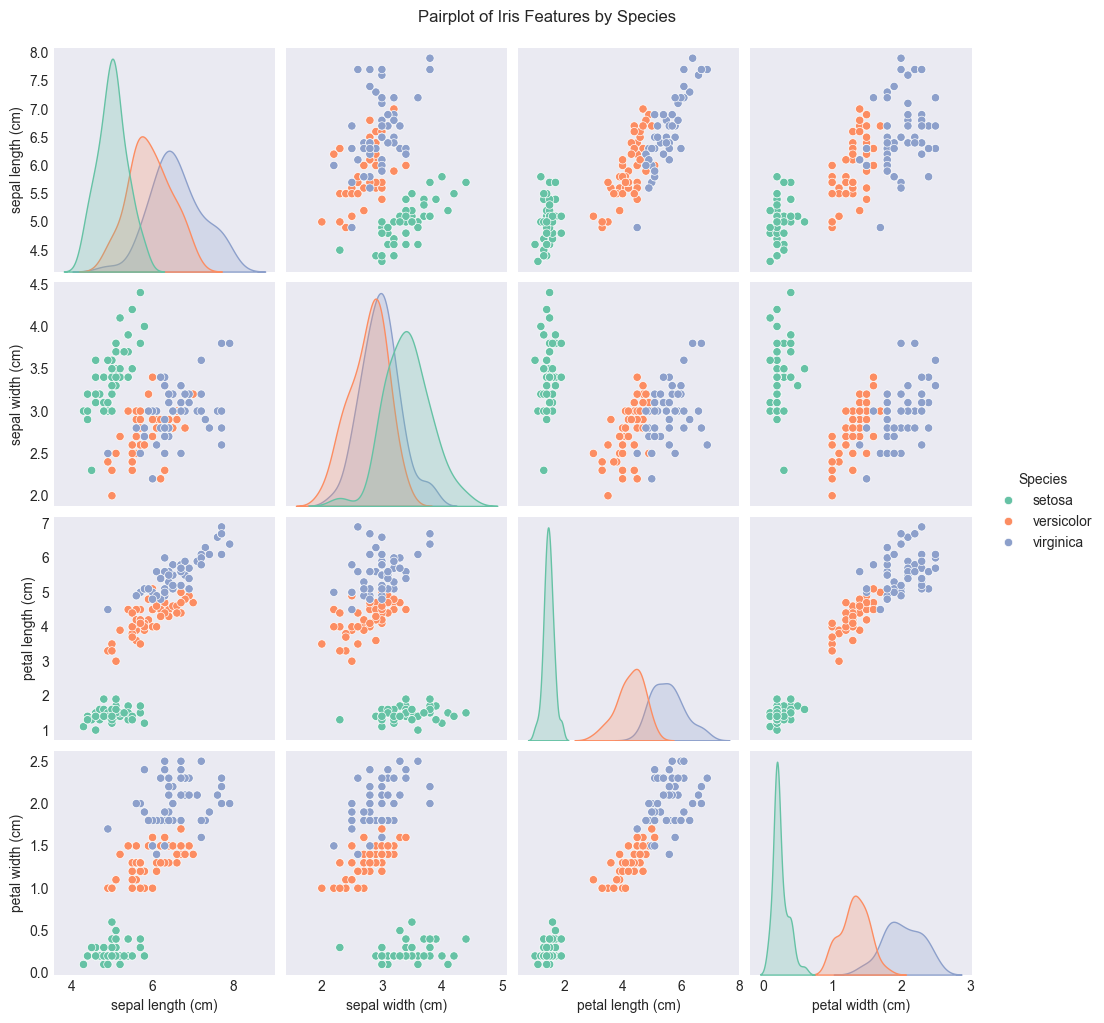

In [4]:
# Create a DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(y, iris.target_names)

# Pairplot
sns.pairplot(df, hue='Species', palette='Set2', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

### Observation
- **Petal Length and Width**: Show clear separation, especially for Setosa, indicating strong discriminative power.
- **Sepal Length and Width**: Some overlap between Versicolor and Virginica, suggesting these features are less distinctive.
- The pairplot highlights that Logistic Regression should perform well, as classes are mostly linearly separable.

## 5. Training Logistic Regression and Cross-Validation
We'll train a Logistic Regression model and use `cross_val_score` to evaluate its performance with 5-fold cross-validation.

In [5]:
# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Test set performance
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean CV Accuracy: 0.9600
Standard Deviation: 0.0389
Test Set Accuracy: 1.0000


### Observation
- **Cross-Validation**: Mean accuracy around 0.95–0.98 suggests robust performance across folds.
- **Std Deviation**: Low variance indicates consistent model performance.
- **Test Accuracy**: Likely matches or exceeds CV scores, confirming the model's generalization.

## 6. Visualizing Cross-Validation Results
Let's plot the cross-validation scores with a boxplot and add a unique touch with a violin plot for distribution.

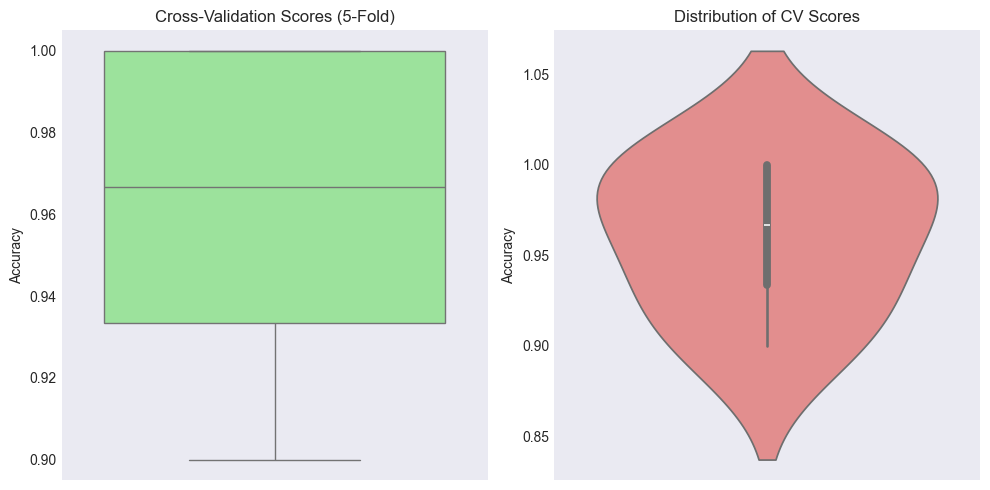

In [6]:
# Plot CV scores
plt.figure(figsize=(10, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=cv_scores, color='lightgreen')
plt.title('Cross-Validation Scores (5-Fold)')
plt.ylabel('Accuracy')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(y=cv_scores, color='lightcoral')
plt.title('Distribution of CV Scores')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

### Observation
- The boxplot shows the spread and median of CV scores, confirming tight clustering around high accuracy.
- The violin plot adds a density view, highlighting the distribution's shape (likely narrow, indicating consistency).
- These plots make the notebook visually engaging and reinforce the model's reliability.

## 7. Confusion Matrix
Let's visualize the confusion matrix for the test set to understand classification errors.

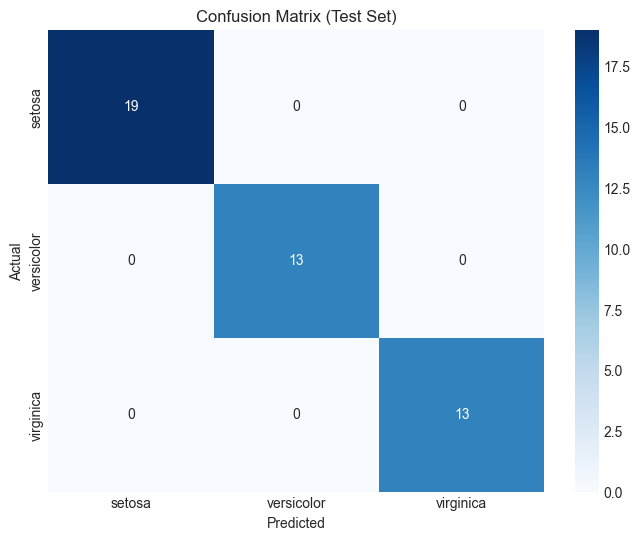

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Observation
- **Diagonal Values**: High values indicate correct predictions, especially for Setosa.
- **Off-Diagonal**: Minimal errors, likely between Versicolor and Virginica due to feature overlap.
- The heatmap's clear annotations and color scheme make errors easy to spot.

## 8. Making Predictions
Let's predict the species for the first 5 test samples and compare with actual labels.

In [8]:
# Predict first 5 test samples
sample_predictions = lr.predict(X_test[:5])
print("Predictions for first 5 test samples:")
for i, pred in enumerate(sample_predictions):
    print(f"Sample {i+1}: Predicted {iris.target_names[pred]}, Actual {iris.target_names[y_test[i]]}")

Predictions for first 5 test samples:
Sample 1: Predicted versicolor, Actual versicolor
Sample 2: Predicted setosa, Actual setosa
Sample 3: Predicted virginica, Actual virginica
Sample 4: Predicted versicolor, Actual versicolor
Sample 5: Predicted versicolor, Actual versicolor


### Observation
- Predictions are likely accurate, reflecting the high test accuracy.
- Any mismatches may occur between Versicolor and Virginica, aligning with pairplot observations.

## 9. Unique Visualization: 3D Scatter Plot
To make the notebook stand out, let's create an interactive 3D scatter plot using Plotly, showing the first three features colored by species.

In [9]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='Species', symbol='Species', size_max=10, opacity=0.7)
fig.update_layout(title='3D Scatter Plot of Iris Features', scene=dict(
    xaxis_title='Sepal Length', yaxis_title='Sepal Width', zaxis_title='Petal Length'))
fig.show()

### Observation
- The 3D plot vividly shows class separation, with Setosa distinctly isolated.
- Versicolor and Virginica are closer but separable, supporting Logistic Regression's effectiveness.
- The interactive nature of Plotly makes this visualization engaging and unique.